In [1]:
from astropy.table import Table
from slsim.Sources.source import Source
from astropy.cosmology import FlatLambdaCDM
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
source_dict_bpl_agn = Table(
    [
        [1.5],
        [4],
        [0.35],
        [0.8],
        [0.76],
        [18],
        [[np.linspace(1, 500, 500)]],
        [1000],
        [10],
        [500],
        [10],
        [8.5],
        [40],
    ],
    names=(
        "z",
        "n_sersic",
        "angular_size",
        "e1",
        "e2",
        "ps_mag_i",
        "MJD",
        "r_out",
        "corona_height",
        "r_resolution",
        "inclination_angle",
        "black_hole_mass_exponent",
        "random_seed",
    ),
)

In [14]:
variable_agn_kwarg_dict = {
    "length_of_light_curve": 3000,
    "time_resolution": 1,
    "log_breakpoint_frequency": 1,
    "low_frequency_slope": 1,
    "high_frequency_slope": 3,
    "standard_deviation": 1,
}

In [15]:
source_bpl_agn = Source(
    source_dict_bpl_agn,
    variability_model="light_curve",
    kwargs_variability={"agn_lightcurve", "g", "i", "z"},
    lightcurve_time=np.linspace(0, 500, 200),
    cosmo=cosmo,
    agn_driving_variability_model="bending_power_law",
    agn_driving_kwargs_variability=variable_agn_kwarg_dict,
)

In [16]:
light_curves = source_bpl_agn.kwargs_variability_extracted;

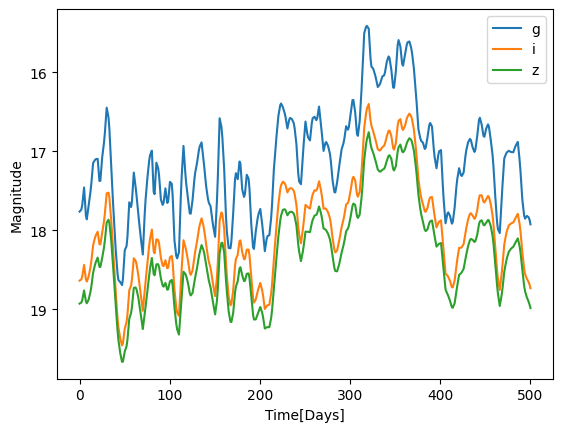

In [17]:
plt.plot(
    light_curves["g"]["MJD"],
    light_curves["g"]["ps_mag_g"],
    label="g",
)
plt.plot(
    light_curves["i"]["MJD"],
    light_curves["i"]["ps_mag_i"],
    label="i",
)
plt.plot(
    light_curves["z"]["MJD"],
    light_curves["z"]["ps_mag_z"],
    label="z",
)


plt.legend()

# plt.ylim(18, 22)
# plt.xlim(100, 200)
plt.gca().invert_yaxis()
plt.ylabel("Magnitude")
plt.xlabel("Time" "[Days]")
plt.show()

In [12]:
# allow for random bpl to be generated. Note that the random seed was already set, so technically every run is predetermined
if "random_seed" in source_dict_bpl_agn.keys():
    del source_dict_bpl_agn["random_seed"]
new_source = Source(
    source_dict_bpl_agn,
    variability_model="light_curve",
    kwargs_variability={"agn_lightcurve", "g", "r", "i", "z"},
    lightcurve_time=np.linspace(0, 1000, 500),
    cosmo=cosmo,
)
new_light_curves = new_source.kwargs_variability_extracted

mean +/- dev z : 18.32 +/- 0.31
mean +/- dev r : 17.56 +/- 0.34
mean +/- dev i : 18.0 +/- 0.32
mean +/- dev g : 17.0 +/- 0.36


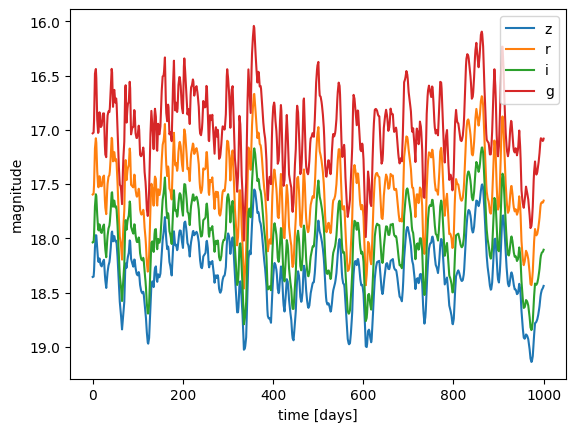

In [13]:
fig, ax = plt.subplots()
for key in new_light_curves.keys():
    ax.plot(
        new_light_curves[key]["MJD"],
        new_light_curves[key]["ps_mag_" + str(key)],
        label=key,
    )
    print(
        "mean +/- dev",
        key,
        ":",
        round(np.mean(new_light_curves[key]["ps_mag_" + str(key)]), 2),
        "+/-",
        round(np.std(new_light_curves[key]["ps_mag_" + str(key)]), 2),
    )
ax.legend(loc=1)
ax.invert_yaxis()
ax.set_xlabel("time [days]")
ax.set_ylabel("magnitude")
plt.show()